In [12]:
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap

In [13]:
def plot_decision_regions(X, y, model, title='Decision Regions', resolution=0.02, labels = ['Height (cm)','Width (cm)']):
    """
    Plots decision regions for a classifier trained on 2D features.
    
    Parameters:
    - X: ndarray, shape (n_samples, 2), input features
    - y: ndarray, shape (n_samples,), labels (assumed binary)
    - model: trained scikit-learn classifier
    - title: plot title
    - resolution: granularity of the meshgrid
    """
    # Set up marker generator and color map
    markers = ('o', '^')
    colors = ('orange', 'yellow')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot decision surface
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = model.predict(grid)
    Z = Z.reshape(xx1.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot all samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=f'Class {cl}',
                    edgecolor='k')

    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Generate synthetic Data

In [14]:
# Set seed for reproducibility
np.random.seed(42)

# Oranges: round-ish
oranges_height = np.random.normal(loc=6.5, scale=0.3, size=50)
oranges_width = np.random.normal(loc=6.2, scale=0.3, size=50)

# Lemons: taller than wide
lemons_height = np.random.normal(loc=7.0, scale=0.4, size=50)
lemons_width = np.random.normal(loc=5.0, scale=0.4, size=50)

# Combine data
X = np.vstack((
    np.column_stack((oranges_height, oranges_width)),
    np.column_stack((lemons_height, lemons_width))
))
y = np.array([0]*50 + [1]*50)  # 0 = orange, 1 = lemon

# Convert to DataFrame
df = pd.DataFrame(X, columns=['height', 'width'])
df['label'] = y

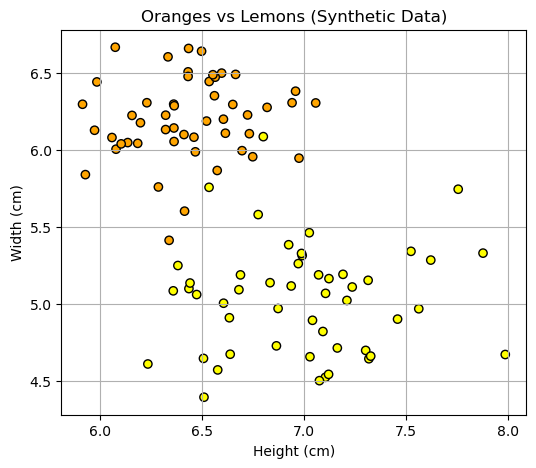

In [15]:
colors = ['orange' if label == 0 else 'yellow' for label in df['label']]
plt.figure(figsize=(6, 5))
plt.scatter( df['height'],df['width'], c=colors, edgecolor='k')
plt.ylabel('Width (cm)')
plt.xlabel('Height (cm)')
plt.title('Oranges vs Lemons (Synthetic Data)')
plt.grid(True)
plt.show()


### KNN

In [16]:
neigh_1 = sk.neighbors.KNeighborsClassifier(n_neighbors=1)
neigh_1.fit(X, y)

neigh_3 = sk.neighbors.KNeighborsClassifier(n_neighbors=3)
neigh_3.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

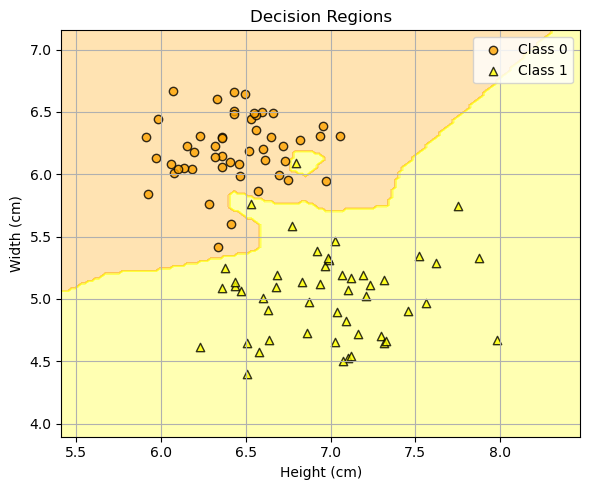

In [17]:
plot_decision_regions(X, y, neigh_1, title='Decision Regions', resolution=0.02)

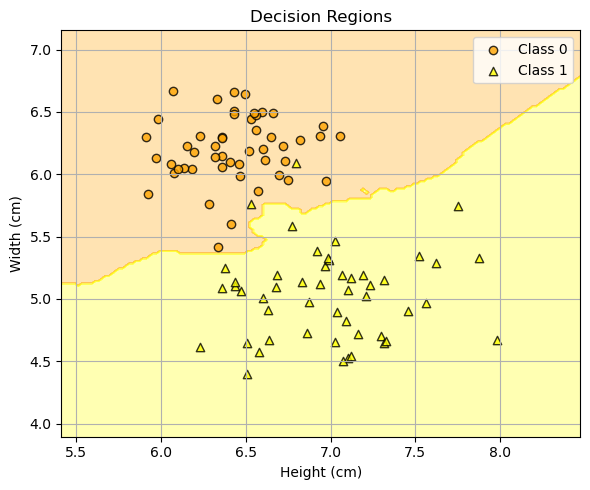

In [18]:
plot_decision_regions(X, y, neigh_3, title='Decision Regions', resolution=0.02)

In [20]:
X_new = X.copy()
X_new.T[0] *= 10

neigh_1_new = sk.neighbors.KNeighborsClassifier(n_neighbors=1)
neigh_1_new.fit(X_new, y)

neigh_3_new = sk.neighbors.KNeighborsClassifier(n_neighbors=3)
neigh_3_new.fit(X_new, y)

KNeighborsClassifier(n_neighbors=3)

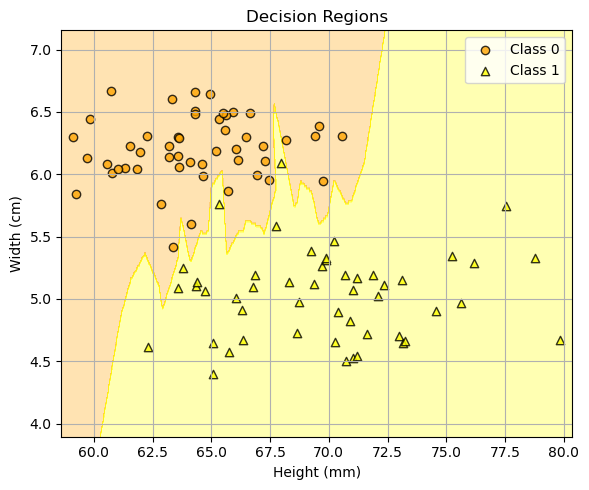

In [21]:
plot_decision_regions(X_new, y, neigh_1_new, title='Decision Regions', resolution=0.02,labels = ['Height (mm)','Width (cm)'])

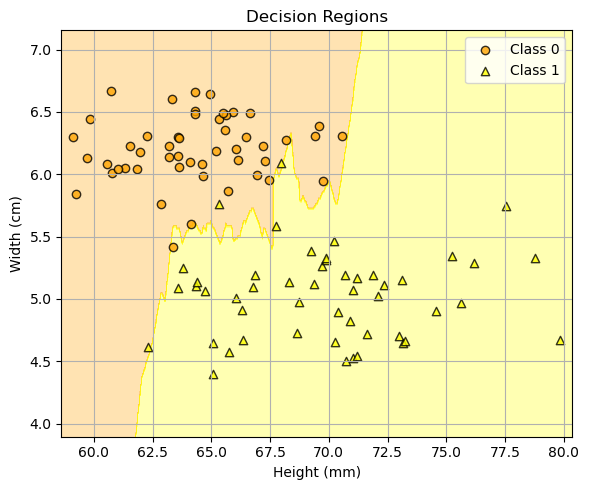

In [22]:
plot_decision_regions(X_new, y, neigh_3_new, title='Decision Regions', resolution=0.02,labels = ['Height (mm)','Width (cm)'])

### NB

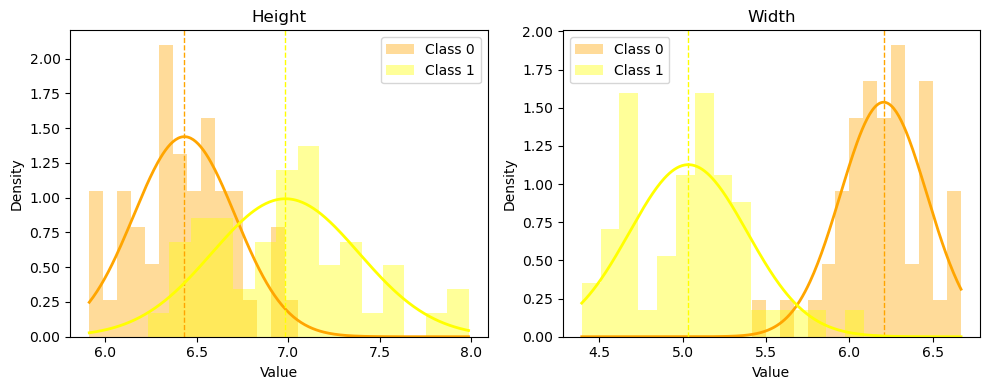

In [28]:
classes = np.unique(y)
n_features = X.shape[1]
colors = ['orange', 'yellow']  

fig, axs = plt.subplots(1, n_features, figsize=(5 * n_features, 4), sharey=False)

if n_features == 1:
    axs = [axs]

for i in range(n_features):
    ax = axs[i]
    x_vals = np.linspace(X[:, i].min(), X[:, i].max(), 300)

    for cls, color in zip(classes, colors):
        feature_data = X[y == cls, i]
        mu = np.mean(feature_data)
        std = np.std(feature_data)

        # Plot histogram
        ax.hist(feature_data, bins=15, density=True, alpha=0.4, label=f"Class {cls}", color=color)

        # Plot Gaussian
        pdf = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-((x_vals - mu) ** 2) / (2 * std ** 2))
        ax.plot(x_vals, pdf, color=color, lw=2)

        # Optional: mean line
        ax.axvline(mu, color=color, linestyle='--', lw=1)

    ax.set_title(['Height','Width'][i])
    ax.set_xlabel("Value")
    ax.set_ylabel("Density")
    ax.legend()

plt.tight_layout()
plt.show()

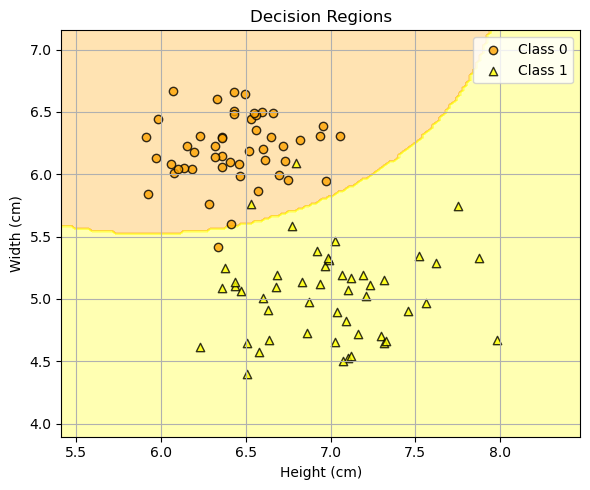

In [11]:
nb = sk.naive_bayes.GaussianNB()
nb.fit(X,y)


plot_decision_regions(X, y, nb, title='Decision Regions', resolution=0.02)

### DT

In [11]:
dt_original = sk.tree.DecisionTreeClassifier(min_samples_leaf=2,criterion='entropy',random_state=42)
dt_original.fit(X, y)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=2, random_state=42)

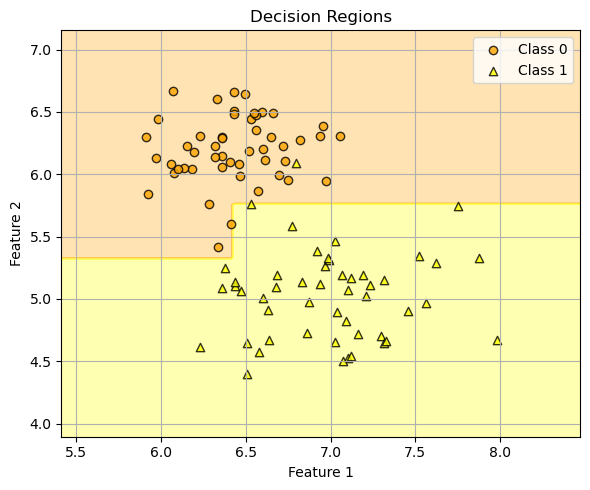

In [12]:
plot_decision_regions(X, y, dt_original, title='Decision Regions', resolution=0.02)

[Text(0.5, 0.875, 'width (cm) <= 5.76\nentropy = 1.0\nsamples = 100\nvalue = [50, 50]\nclass = Orange'),
 Text(0.3, 0.625, 'height (mm) <= 6.423\nentropy = 0.239\nsamples = 51\nvalue = [2, 49]\nclass = Lemon'),
 Text(0.4, 0.75, 'True  '),
 Text(0.2, 0.375, 'width (cm) <= 5.332\nentropy = 0.971\nsamples = 5\nvalue = [2, 3]\nclass = Lemon'),
 Text(0.1, 0.125, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = Lemon'),
 Text(0.3, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = Orange'),
 Text(0.4, 0.375, 'entropy = 0.0\nsamples = 46\nvalue = [0, 46]\nclass = Lemon'),
 Text(0.7, 0.625, 'height (mm) <= 6.773\nentropy = 0.144\nsamples = 49\nvalue = [48.0, 1.0]\nclass = Orange'),
 Text(0.6, 0.75, '  False'),
 Text(0.6, 0.375, 'entropy = 0.0\nsamples = 43\nvalue = [43, 0]\nclass = Orange'),
 Text(0.8, 0.375, 'width (cm) <= 6.183\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]\nclass = Orange'),
 Text(0.7, 0.125, 'entropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = Orange'),
 Text(0.

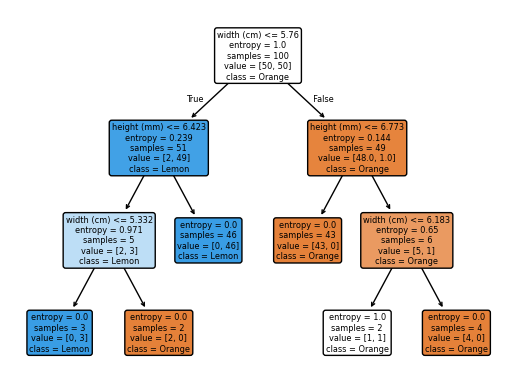

In [13]:
sk.tree.plot_tree(dt_original,feature_names=["height (mm)", "width (cm)"], 
          class_names=["Orange", "Lemon"], 
          filled=True, 
          rounded=True)

### NNs

In [77]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

nn = make_pipeline(
    StandardScaler(),
    sk.neural_network.MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=5000, random_state=42)
)
nn.fit(X, y)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(10,), max_iter=5000,
                               random_state=42))])

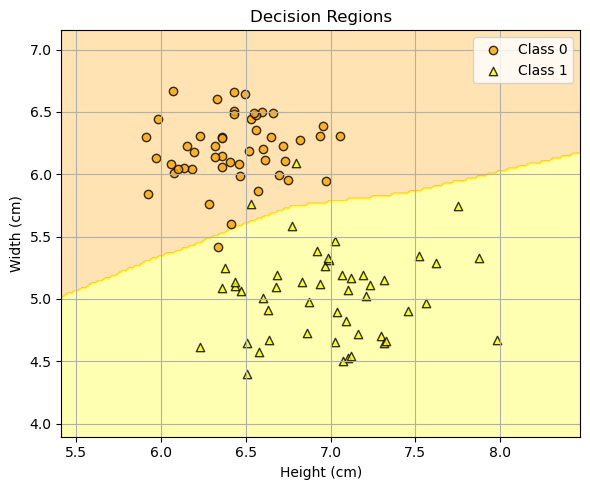

In [78]:
plot_decision_regions(X, y, nn, title='Decision Regions', resolution=0.02)

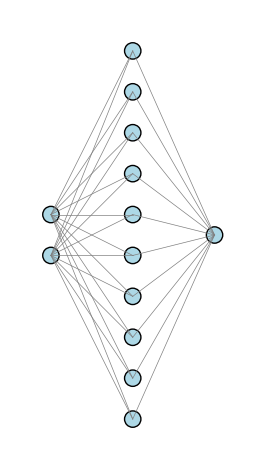

In [81]:
import matplotlib.pyplot as plt

def draw_mlp(layers, neuron_radius=0.2):
    fig, ax = plt.subplots()

    ax.axis('off')

    v_spacing = 1
    h_spacing = 2

    max_layer_size = max(layers)
    total_width = h_spacing * (len(layers) - 1)
    total_height = v_spacing * (max_layer_size - 1)

    # Draw neurons and connections
    neuron_positions = []

    for i, layer_size in enumerate(layers):
        layer_x = i * h_spacing
        layer_positions = []
        layer_top = (max_layer_size - layer_size) / 2 * v_spacing
        for j in range(layer_size):
            y = total_height - (layer_top + j * v_spacing)
            neuron = plt.Circle((layer_x, y), neuron_radius, fill=True, color='lightblue', ec='black')
            ax.add_patch(neuron)
            layer_positions.append((layer_x, y))
        neuron_positions.append(layer_positions)

    # Draw edges
    for i in range(len(neuron_positions) - 1):
        for (x1, y1) in neuron_positions[i]:
            for (x2, y2) in neuron_positions[i + 1]:
                ax.plot([x1, x2], [y1, y2], 'gray', linewidth=0.5)

    # Set limits with padding
    ax.set_xlim(-1, total_width + 1)
    ax.set_ylim(-1, total_height + 1)
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

# Example: Input (2), Hidden (10), Output (1)
draw_mlp([2, 10, 1])
